In [1]:
# importing the libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters  # timestamp converters
import seaborn as sns

In [2]:
# setting up the notebook parameters

root_dir = os.path.dirname(os.path.abspath(os.getcwd()))
plt.rcParams["figure.figsize"] = (12, 8)
register_matplotlib_converters()
sns.set_style("darkgrid")
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", None)
pd.set_option('max_colwidth', 800)

### Helper Functions

In [3]:
def reduce_mem_usage(df, verbose=True):
    """
    reduces the memory usage
    inp: dataframe
    outp: dataframe
    """
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [4]:
def info_df(dataframe):
    """
    returns uniques and nulls in the dataframes
    """
    return pd.DataFrame({
        "uniques": dataframe.nunique(),
        "nulls": dataframe.isnull().sum()
    }).T

In [ ]:
def bar_plot(df, x_col, y_col, title):
    """
    plots the barplot
    """
    plt.figure(figsize = (12, 8))
    ax = sns.barplot(x = df[x_col], y = df[y_col])
    ax.set(xlabel = "", ylabel = y_col)
    for i, v in enumerate(df[y_col].iteritems()):        
        ax.text(i ,v[1], "{:,}".format(v[1]), color='k', va ='bottom', rotation=45)
    plt.title(title)
    plt.xticks(rotation = 45)
    plt.show()

In [84]:
%%time
train_df = pd.read_csv(os.path.join(root_dir, "data", "interim_data", "train_agg.csv"))
train_df = reduce_mem_usage(train_df, verbose=True)                                      # reduces the memory usage
train_df.head()

Mem. usage decreased to 886.86 Mb (64.1% reduction)
CPU times: user 16.5 s, sys: 1.94 s, total: 18.5 s
Wall time: 18.5 s


,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0


---

In [7]:
######## Don't Run #######
# info_df(train_df)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
uniques,1449,4,8784,1688175,16,16,1397,116,18,619,10,522,128,133,43,58
nulls,0,0,0,0,0,0,0,12127645,16709167,96658,8825365,100140,3749023,1231669,1449048,143676


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 16 columns):
building_id           int16
meter                 int8
timestamp             object
meter_reading         float32
site_id               int8
primary_use           object
square_feet           int32
year_built            float16
floor_count           float16
air_temperature       float16
cloud_coverage        float16
dew_temperature       float16
precip_depth_1_hr     float16
sea_level_pressure    float16
wind_direction        float16
wind_speed            float16
dtypes: float16(9), float32(1), int16(1), int32(1), int8(2), object(2)
memory usage: 886.9+ MB


1. Foreign_keys:
    - ``building_id``
    - ``site_id``
2. Nulls:
    - ``year_built`` => 12127645
    - ``floor_count`` => 16709167
    - ``air_temperature`` => 96658
    - ``cloud_coverage`` => 8825365
    - ``dew_temperature`` => 100140
    - ``precip_depth_1_hr`` => 3749023
    - ``sea_level_pressure`` => 1231669
    - ``wind_direction`` => 1449048
    - ``wind_speed`` => 143676
3. Categorical columns:
    - ``meter`` => already encoded
    - ``primary_use`` => to be encoded

In [7]:
train_df["timestamp"] = pd.to_datetime(train_df["timestamp"])

#### 1.) frequency of various categories in the ``meter``

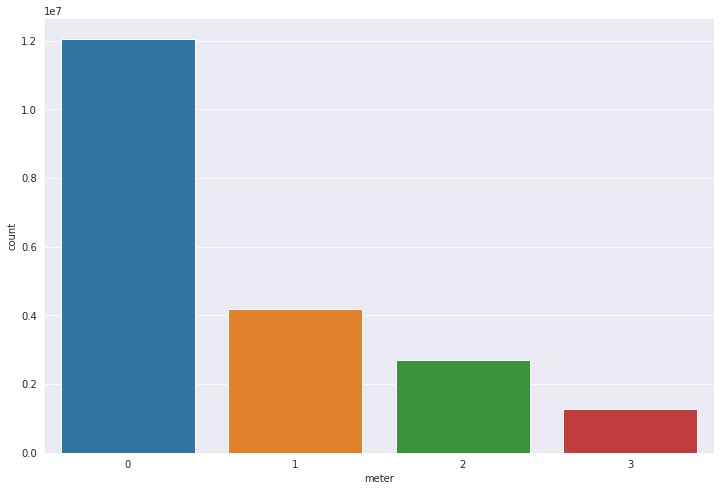

In [8]:
sns.countplot(train_df["meter"])
plt.show()

- Most of the meters are electricity meters. They are followed by chilled water meters, followed by steam and hot water meter.

#### 2.) for one ``building_id``, check whether same ``buidling_id`` have multiple readings for one kind of meter

In [9]:
# groupby building_id and aggregate meter
temp_df = train_df.groupby("building_id").agg({
    "meter": ["nunique", "count"]
})

temp_df.columns = ["_".join(i) for i in temp_df.columns.ravel()]
temp_df.sample(5)

,meter_nunique,meter_count
building_id,,
1260,3,26352
843,1,8447
131,1,8784
927,3,26313
1036,1,8784


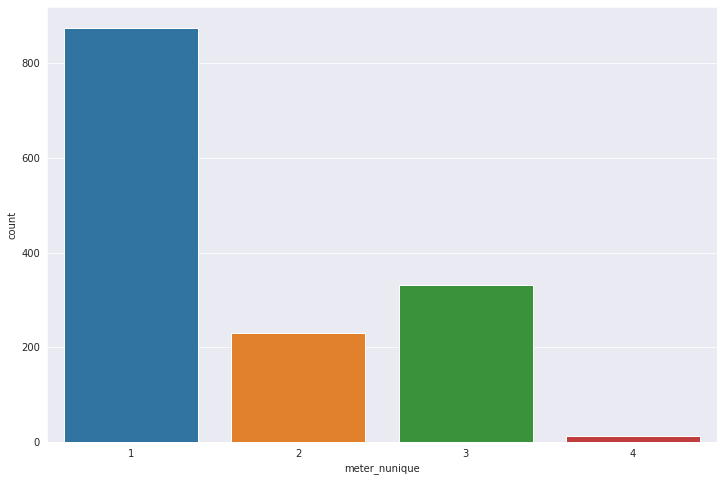

In [10]:
# plot frequencies of meter_nuniques
sns.countplot(temp_df["meter_nunique"])
plt.show()

In [11]:
# building_ids with 4 meters
temp_df[temp_df["meter_nunique"] == 4]

,meter_nunique,meter_count
building_id,,
1232,4,34131
1241,4,35116
1249,4,35136
1258,4,31967
1259,4,35099
1293,4,33714
1294,4,35108
1295,4,35108
1296,4,35115


In [12]:
temp_df[temp_df["meter_nunique"] == 3].sample(5)

,meter_nunique,meter_count
building_id,,
1210,3,26346
1272,3,26260
771,3,26275
915,3,26309
1219,3,26352


In [13]:
temp_df[temp_df["meter_nunique"] == 2].sample(5)

,meter_nunique,meter_count
building_id,,
1400,2,15833
60,2,16052
1198,2,17568
764,2,17558
252,2,17555


In [14]:
temp_df[temp_df["meter_nunique"] == 1].sample(5)

,meter_nunique,meter_count
building_id,,
211,1,8781
815,1,8255
675,1,8784
48,1,7371
548,1,8758


In [15]:
# Why a certain building_id have so many datapoints
train_df[train_df["building_id"] == 1232].head(8)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
1804,1232,0,2016-01-01 00:00:00,211.988007,14,Education,181328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1805,1232,1,2016-01-01 00:00:00,442.558990,14,Education,181328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1806,1232,2,2016-01-01 00:00:00,0.000000,14,Education,181328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1807,1232,3,2016-01-01 00:00:00,928.492981,14,Education,181328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4100,1232,0,2016-01-01 01:00:00,211.000000,14,Education,181328,NaN,NaN,5.601562,0.0,-0.600098,0.0,1019.5,300.0,2.599609
4101,1232,1,2016-01-01 01:00:00,364.156006,14,Education,181328,NaN,NaN,5.601562,0.0,-0.600098,0.0,1019.5,300.0,2.599609
4102,1232,2,2016-01-01 01:00:00,0.000000,14,Education,181328,NaN,NaN,5.601562,0.0,-0.600098,0.0,1019.5,300.0,2.599609
4103,1232,3,2016-01-01 01:00:00,1093.500000,14,Education,181328,NaN,NaN,5.601562,0.0,-0.600098,0.0,1019.5,300.0,2.599609


- Only 13 out of 1449 Building_IDs have all four meter types
- We have hourly data for every meter (== 0 | == 1 | == 2 | ==3), 2016-01-01 to 2016-12-31.

#### 3.) for one Building_ID, check whether all the meters follow similar trend or not

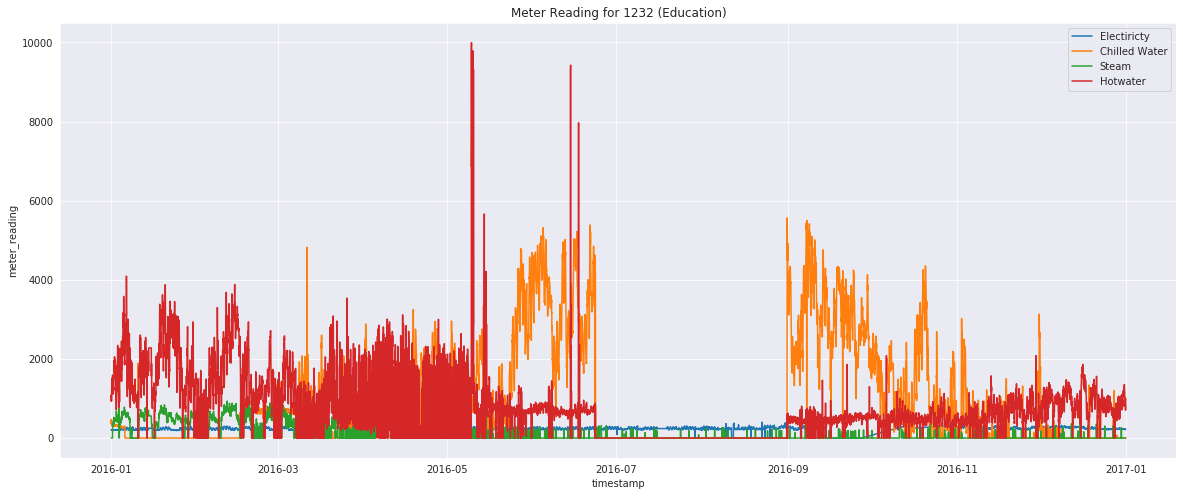

In [16]:
plt.figure(figsize = (20, 8))
temp_df = train_df[train_df["building_id"] == 1232]

sns.lineplot(x = temp_df[temp_df["meter"] == 0]["timestamp"], y = temp_df[temp_df["meter"] == 0]["meter_reading"], label = "Electiricty")
sns.lineplot(x = temp_df[temp_df["meter"] == 1]["timestamp"], y = temp_df[temp_df["meter"] == 1]["meter_reading"], label = "Chilled Water")
sns.lineplot(x = temp_df[temp_df["meter"] == 2]["timestamp"], y = temp_df[temp_df["meter"] == 2]["meter_reading"], label = "Steam")
sns.lineplot(x = temp_df[temp_df["meter"] == 3]["timestamp"], y = temp_df[temp_df["meter"] == 3]["meter_reading"], label = "Hotwater")
plt.legend()
plt.title("Meter Reading for 1232 (Education)")
plt.show()

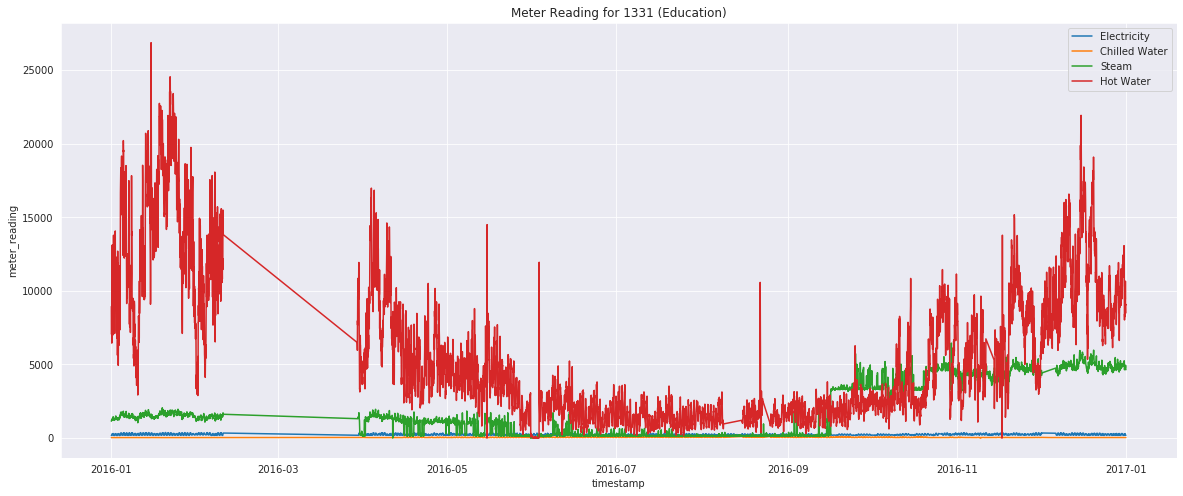

In [17]:
plt.figure(figsize = (20, 8))
temp_df = train_df[train_df["building_id"] == 1331]

sns.lineplot(x = temp_df[temp_df["meter"] == 0]["timestamp"], y = temp_df[temp_df["meter"] == 0]["meter_reading"], label = "Electricity")
sns.lineplot(x = temp_df[temp_df["meter"] == 1]["timestamp"], y = temp_df[temp_df["meter"] == 1]["meter_reading"], label = "Chilled Water")
sns.lineplot(x = temp_df[temp_df["meter"] == 2]["timestamp"], y = temp_df[temp_df["meter"] == 2]["meter_reading"], label = "Steam")
sns.lineplot(x = temp_df[temp_df["meter"] == 3]["timestamp"], y = temp_df[temp_df["meter"] == 3]["meter_reading"], label = "Hot Water")
plt.legend()
plt.title("Meter Reading for 1331 (Education)")
plt.show()

There are a few problems with this dataset:-
- The dataset contains number of different time series, but a positive sign is that they are defined in the same timespace.
- Certain time series, as we see in the above graph breaks in between, giving it the intermittent nature.
- The scale of every meter is very different from other.

#### 4.) Checking for missing values in the time series

In [18]:
"""
Code for this snippet is attributed to - https://www.kaggle.com/caesarlupum/ashrae-start-here-a-gentle-introduction
"""

#train_df = train_df.set_index(["timestamp"])

# plot missing values per building per meter
# f, axis = plt.subplots(1, 4, figsize = (20, 30))
# for meter in range(0, 4):
#     temp_df = train_df[train_df["meter"] == meter].copy().reset_index()
#     temp_df["timestamp"] = pd.to_timedelta(temp_df["timestamp"]).dt.total_seconds() / 3600
#     temp_df["timestamp"] = temp_df["timestamp"].astype(int)
#     temp_df["timestamp"] -= temp_df["timestamp"].min()
#     missmap = np.empty((1449, temp_df["timestamp"].max() + 1))
#     missmap.fill(np.nan)
    
#     for i in temp_df.values:
#         if i[2] != meter:
#             continue
#         missmap[int(i[1]), int(i[0])] = 0 if i[3] == 0 else 1
#     axis[meter].set_title(f"meter {meter: d}")
#     sns.heatmap(missmap, cmap = "Paired", ax = axis[meter], cbar = False)

'\nCode for this snippet is attributed to - https://www.kaggle.com/caesarlupum/ashrae-start-here-a-gentle-introduction\n'

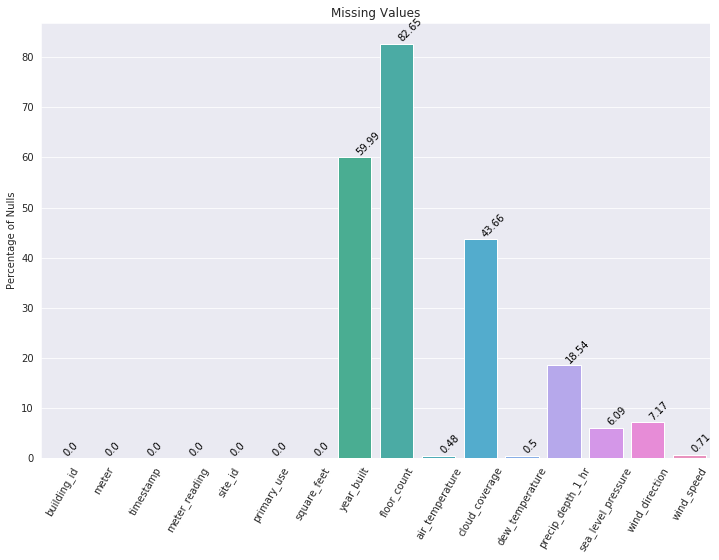

In [86]:
# check what fraction of values have null values in data set
null_df = pd.DataFrame(train_df.isnull().sum())
null_df.columns = ["nulls"]
null_df["percent_nulls"] = round((null_df["nulls"]/len(train_df) * 100), 2)

# plotting barplot
plt.figure(figsize = (12, 8))
ax = sns.barplot(x = null_df.index, y = null_df["percent_nulls"])
ax.set(xlabel = "", ylabel = "Percentage of Nulls")
for i, v in enumerate(null_df["percent_nulls"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='k', va ='bottom', rotation=45)
plt.title("Missing Values")
plt.xticks(rotation = 60)
plt.show()

In [89]:
# filling the missing values with -1
train_df = train_df.fillna(-1)

---
## Exploratory Data Analysis - Flow
Approaching the problem as follow:-
- We have multiple time-series. Because of this, we will derive do our analysis by randomly choosing these time-series rather than working on whole set of data at once.
- Currently, we are going ahead with imputing the null values with -1. In our analysis, we will deep into cross attribute relationships to check whether we can map these attribute using other attributes.

The EDA will be done in two phases:-
1. For the attributes that are constant in one time series
    - building_id
    - meter
    - site_id
    - primary_use
    - square_feet
    - floor_count
    - year_built
2. For the attributes that are varying in one time series
    - timestamp
    - air_temperature
    - cloud_coverage
    - dew_temperature
    - precip_depth_1hr
    - sea_level_pressure
    - wind_direction
    - wind_speed
    
For the first phase, we will check following:-
1. Consumption of various meters based on year the house is built
2. Consumption based on primary use building is used for

### Consumption of various meters based on year the house is built

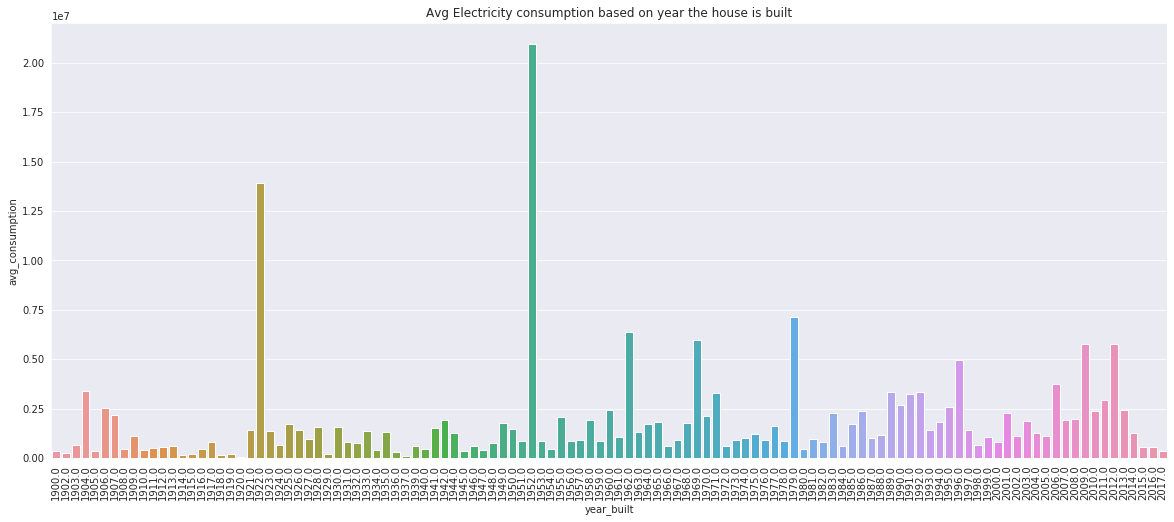

In [21]:
temp_df = train_df[(train_df["meter"] == 0)]
temp_df = temp_df.groupby("year_built").agg({
    "meter_reading": "sum",
    "building_id": "nunique"
})
temp_df["avg_consumption"] = temp_df["meter_reading"] / temp_df["building_id"]

plt.figure(figsize = (20, 8))
sns.barplot(x = temp_df.iloc[1:].index, y = temp_df.iloc[1:]["avg_consumption"]) # dropped column with year built = -1
plt.xticks(rotation = 90)
plt.title("Avg Electricity consumption based on year the house is built")
plt.show()

- There is no clear trend between the year the house was built and consumption of electricity.
- Most of the summaries might mislead because in most the years, number of the houses built is 1.
- The two peaks in 1922 and 1952 belong to healthcare and educational category, hence have huge peaks.

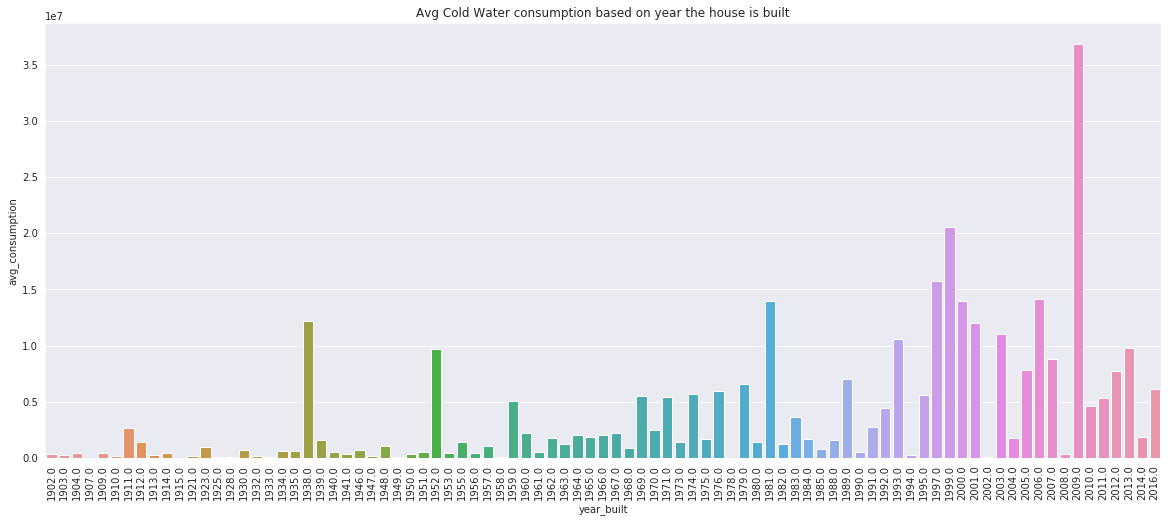

In [22]:
temp_df = train_df[(train_df["meter"] == 1)]
temp_df = temp_df.groupby("year_built").agg({
    "meter_reading": "sum",
    "building_id": "nunique"
})
temp_df["avg_consumption"] = temp_df["meter_reading"] / temp_df["building_id"]

plt.figure(figsize = (20, 8))
sns.barplot(x = temp_df.iloc[1:].index, y = temp_df.iloc[1:]["avg_consumption"]) # dropped column with year built = -1
plt.xticks(rotation = 90)
plt.title("Avg Cold Water consumption based on year the house is built")
plt.show()

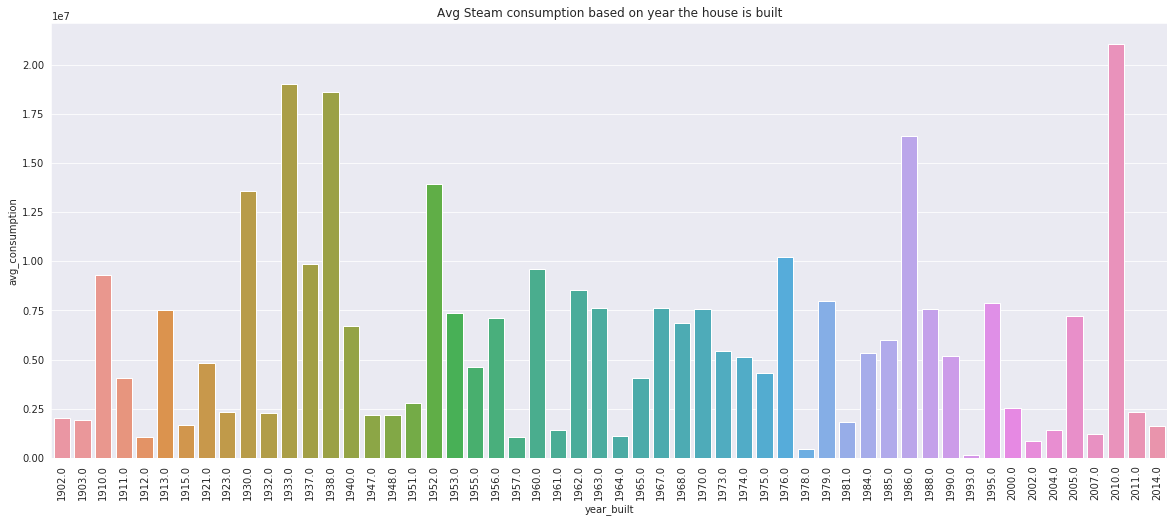

In [23]:
temp_df = train_df[(train_df["meter"] == 2)]
temp_df = temp_df.groupby("year_built").agg({
    "meter_reading": "sum",
    "building_id": "nunique"
})
temp_df["avg_consumption"] = temp_df["meter_reading"] / temp_df["building_id"]

plt.figure(figsize = (20, 8))
sns.barplot(x = temp_df.iloc[1:].index, y = temp_df.iloc[1:]["avg_consumption"]) # dropped column with year built = -1
plt.xticks(rotation = 90)
plt.title("Avg Steam consumption based on year the house is built")
plt.show()

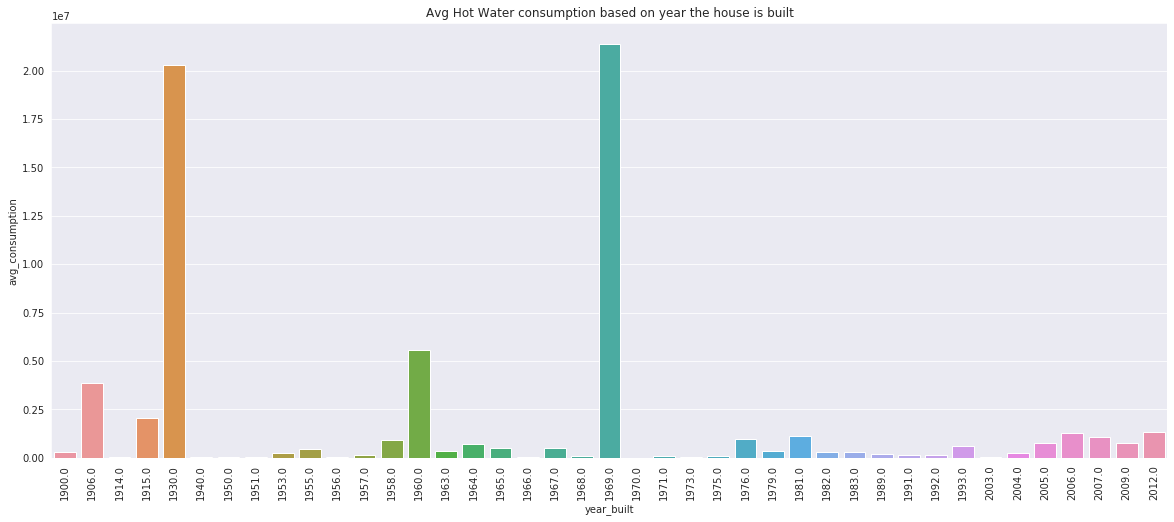

In [24]:
temp_df = train_df[(train_df["meter"] == 3)]
temp_df = temp_df.groupby("year_built").agg({
    "meter_reading": "sum",
    "building_id": "nunique"
})
temp_df["avg_consumption"] = temp_df["meter_reading"] / temp_df["building_id"]

plt.figure(figsize = (20, 8))
sns.barplot(x = temp_df.iloc[1:].index, y = temp_df.iloc[1:]["avg_consumption"]) # dropped column with year built = -1
plt.xticks(rotation = 90)
plt.title("Avg Hot Water consumption based on year the house is built")
plt.show()

### Checking average consumption based on the `primary_use`

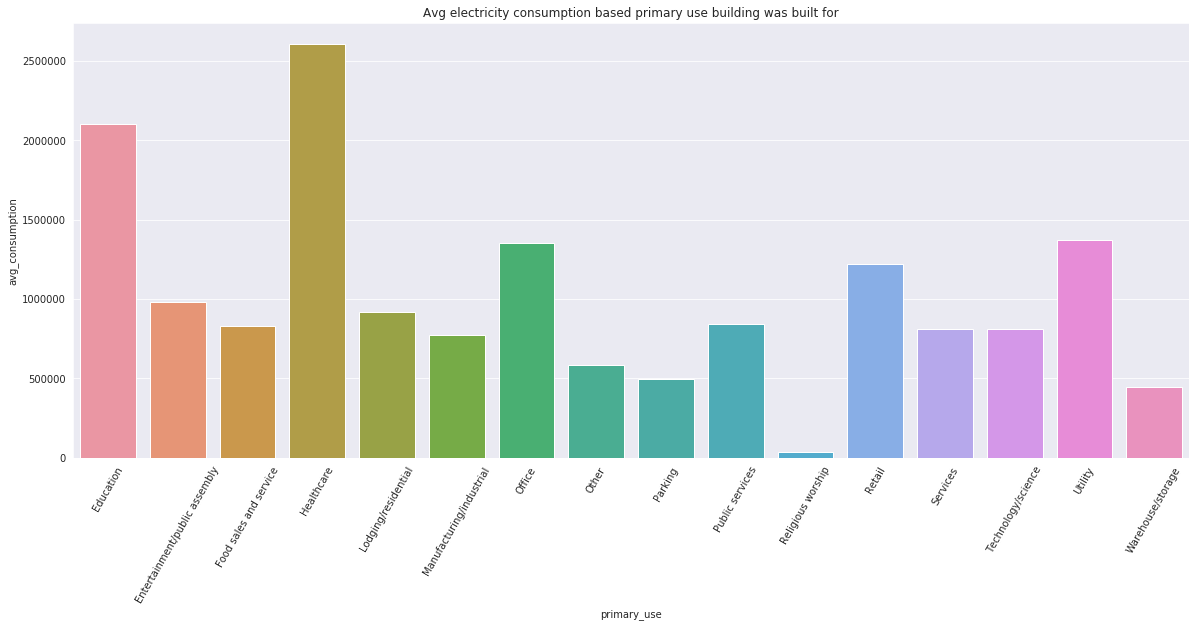

In [25]:
temp_df = train_df[(train_df["meter"] == 0)]
temp_df = temp_df.groupby("primary_use").agg({
    "meter_reading": "sum",
    "building_id": "nunique"
})
temp_df["avg_consumption"] = temp_df["meter_reading"] / temp_df["building_id"]

plt.figure(figsize = (20, 8))
sns.barplot(x = temp_df.index, y = temp_df["avg_consumption"]) # dropped column with year built = -1
plt.xticks(rotation = 60)
plt.title("Avg electricity consumption based primary use building was built for")
plt.show()

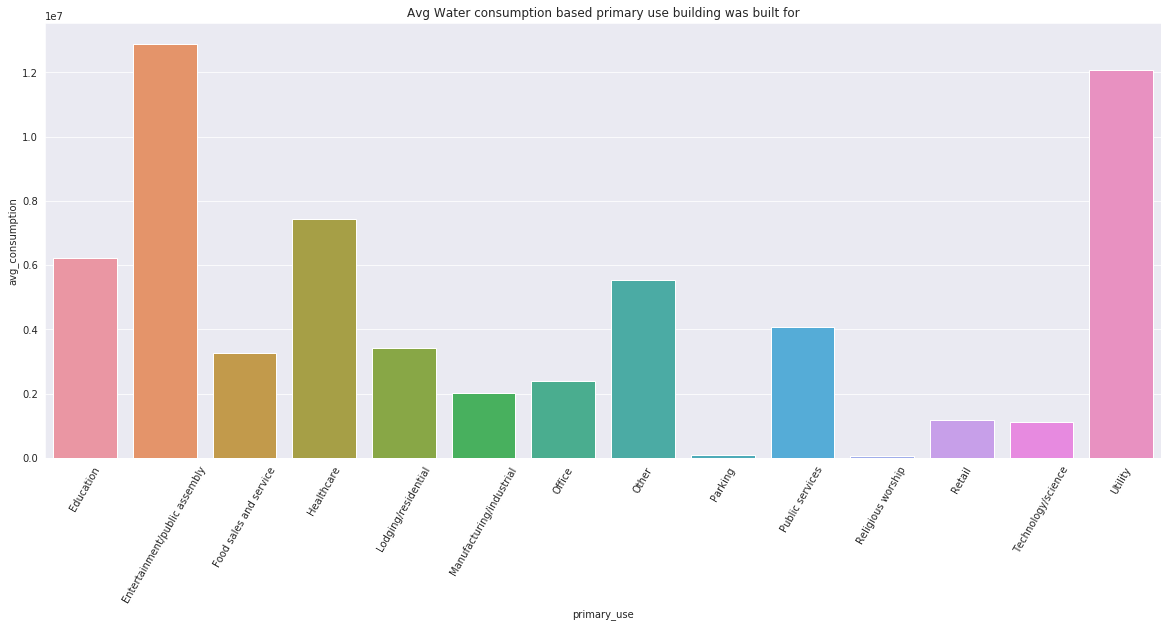

In [26]:
temp_df = train_df[(train_df["meter"] == 1)]
temp_df = temp_df.groupby("primary_use").agg({
    "meter_reading": "sum",
    "building_id": "nunique"
})
temp_df["avg_consumption"] = temp_df["meter_reading"] / temp_df["building_id"]

plt.figure(figsize = (20, 8))
sns.barplot(x = temp_df.index, y = temp_df["avg_consumption"]) # dropped column with year built = -1
plt.xticks(rotation = 60)
plt.title("Avg Water consumption based primary use building was built for")
plt.show()

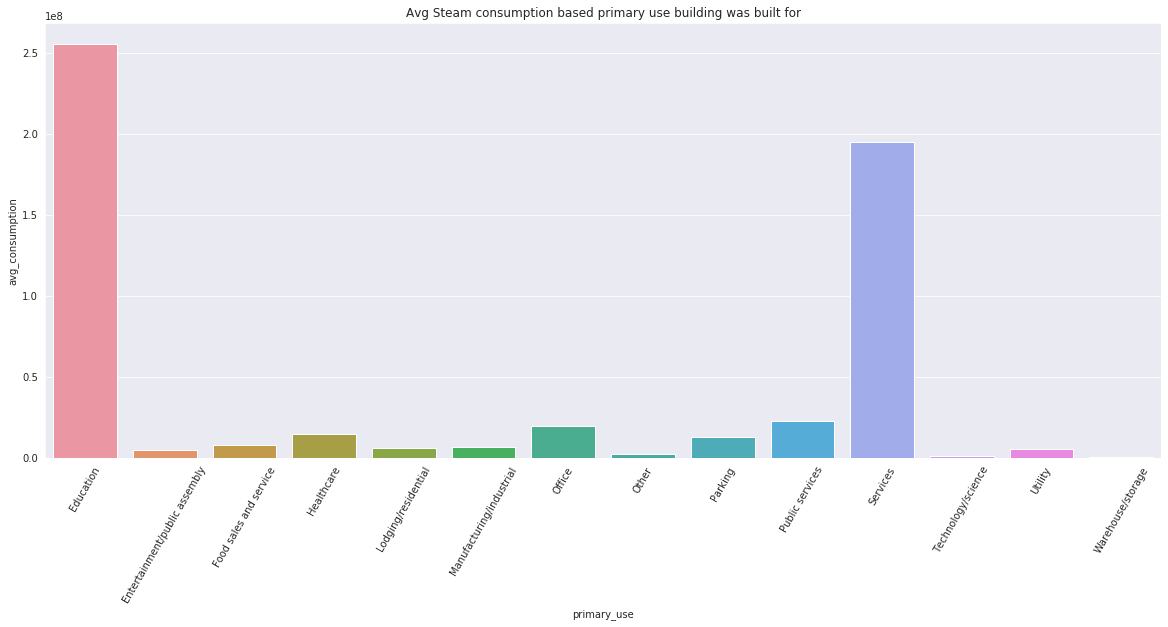

In [27]:
temp_df = train_df[(train_df["meter"] == 2)]
temp_df = temp_df.groupby("primary_use").agg({
    "meter_reading": "sum",
    "building_id": "nunique"
})
temp_df["avg_consumption"] = temp_df["meter_reading"] / temp_df["building_id"]

plt.figure(figsize = (20, 8))
sns.barplot(x = temp_df.index, y = temp_df["avg_consumption"]) # dropped column with year built = -1
plt.xticks(rotation = 60)
plt.title("Avg Steam consumption based primary use building was built for")
plt.show()

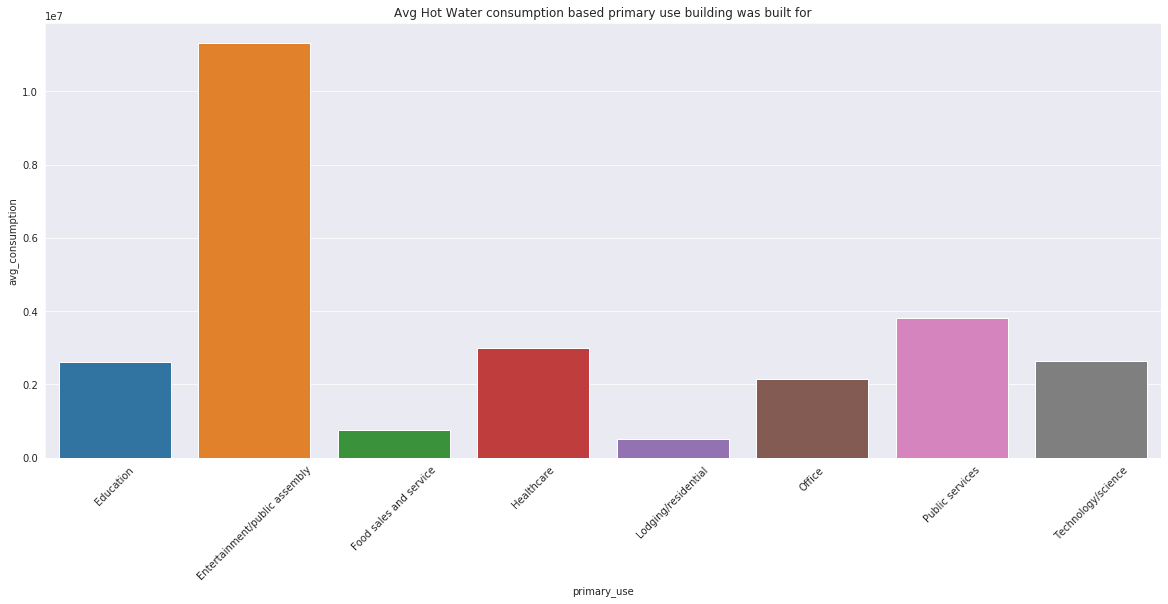

In [28]:
temp_df = train_df[(train_df["meter"] == 3)]
temp_df = temp_df.groupby("primary_use").agg({
    "meter_reading": "sum",
    "building_id": "nunique"
})
temp_df["avg_consumption"] = temp_df["meter_reading"] / temp_df["building_id"]

plt.figure(figsize = (20, 8))
sns.barplot(x = temp_df.index, y = temp_df["avg_consumption"]) # dropped column with year built = -1
plt.xticks(rotation = 45)
plt.title("Avg Hot Water consumption based primary use building was built for")
plt.show()

### Checking Average consumption based Square Feet
##### H0: `square_feet` has no effect in average electricity comsumption 
##### HA: Average electricity consumption increases with increase in `square_feet`

In [87]:
def total_consumption_sq_ft(df, meter_type = None):
    """
    outputs a data frame with total meter consumption based on building_id 
    """
    temp_df = train_df[train_df["meter"] == meter_type]
    temp_df = temp_df.groupby("building_id").agg({
        "square_feet": "first",
        "meter_reading": "sum",
        "primary_use": "first",
    })
    
    # measuring primary_use - wise correlation
    primary_use_list = []
    corr_list = []
    for i in list(temp_df["primary_use"].unique()):
        corr = temp_df[temp_df["primary_use"] == i]["meter_reading"].corr(temp_df[temp_df["primary_use"] == i]["square_feet"])
        primary_use_list.append(i)
        corr_list.append(corr)

    corr_df = pd.DataFrame({
        "primary_use": primary_use_list,
        "correlation": list(np.around(np.array(corr_list), 2)) 
    })
    return temp_df, corr_df

#### For Electricity meters

In [90]:
electricity_df, elec_corr_df = total_consumption_sq_ft(train_df, meter_type = 0)

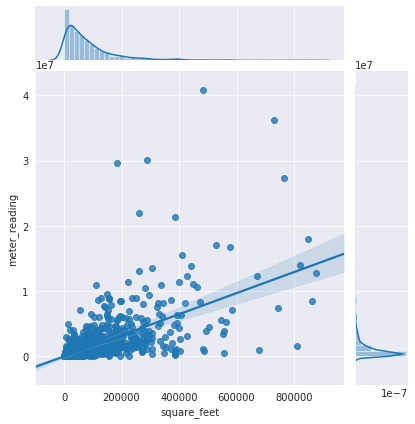

In [91]:
sns.jointplot(x = "square_feet", y = "meter_reading", data = electricity_df, kind = "reg")
plt.show()

In [92]:
print("Correlation between Square Feet and Total Electricity Consumption = {}".format(electricity_df["meter_reading"].corr(electricity_df["square_feet"])))

Correlation between Square Feet and Total Electricity Consumption = 0.6207478581186101


The above correlation that we got is cumulative of all kinds of buildings present in the dataset. Now, we will measure the correlation based on different kinds of buildings we have. 

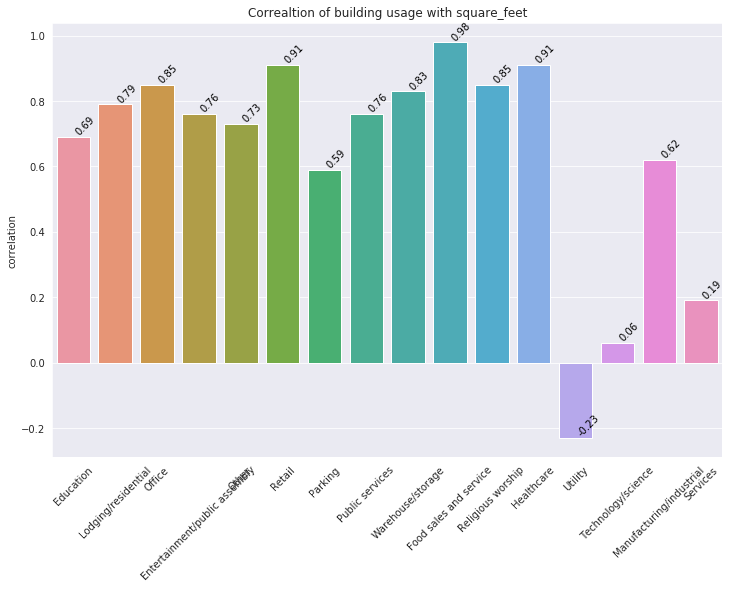

In [93]:
# plotting barplot
bar_plot(corr_df, x_col = "primary_use", y_col = "correlation", title = "Correaltion of building usage with square_feet")

#### For Cold Water meters

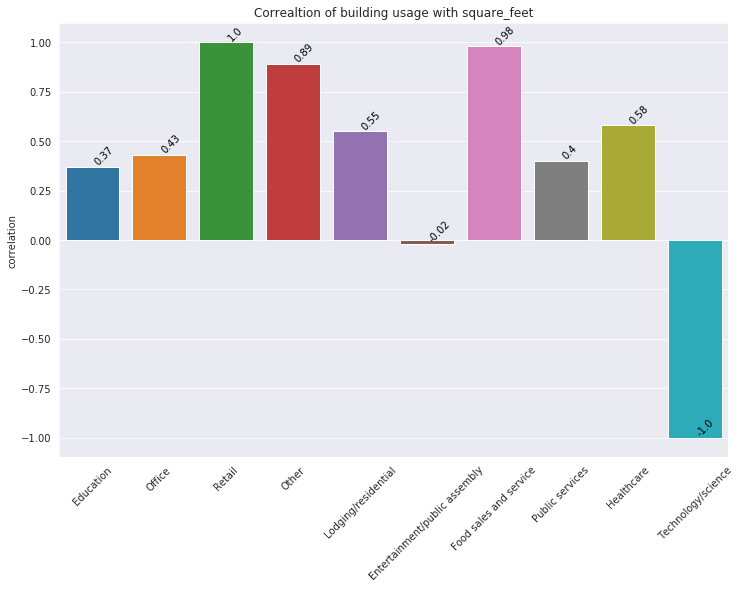

In [102]:
water_df, water_corr_df = total_consumption_sq_ft(train_df, meter_type = 1)

# plotting barplot for checking correlation between the primary_use and square_feet
bar_plot(water_corr_df.dropna(), x_col = "primary_use", y_col = "correlation", title = "Correaltion of building usage with square_feet")

#### For Steam meters

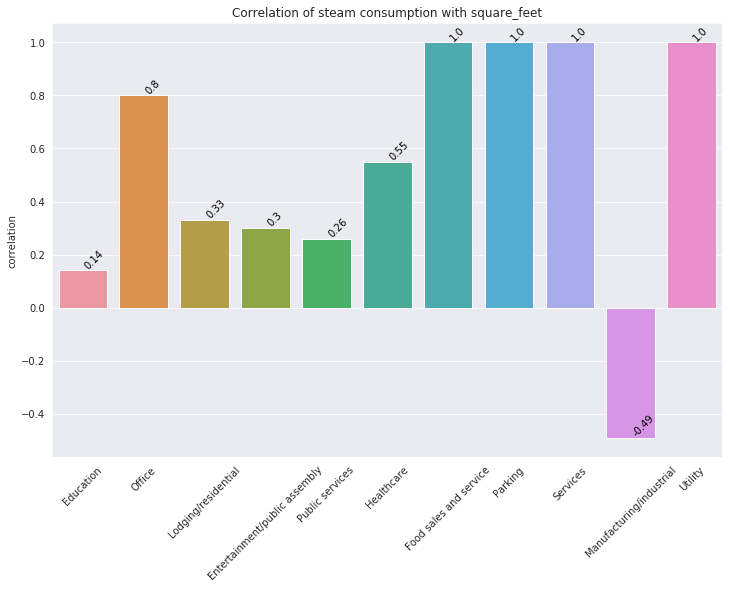

In [103]:
steam_df, steam_corr_df = total_consumption_sq_ft(train_df, meter_type = 2)

# plotting barplot for checking correlation between the primary_use and square_feet
bar_plot(steam_corr_df.dropna(), x_col = "primary_use", y_col = "correlation", title = "Correlation of steam consumption with square_feet")

#### For Hot Water meters

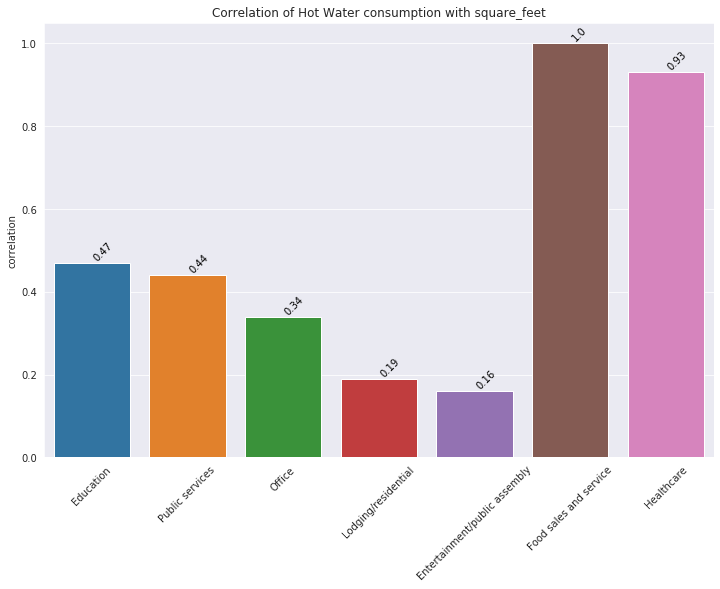

In [105]:
steam_df, steam_corr_df = total_consumption_sq_ft(train_df, meter_type = 3)

# plotting barplot for checking correlation between the primary_use and square_feet
bar_plot(steam_corr_df.dropna(), x_col = "primary_use", y_col = "correlation", title = "Correlation of Hot Water consumption with square_feet")

### Checking the Distribuition of various classes based on the Site_ID

In [48]:
temp_df = train_df[train_df["meter"] == 0]
temp_df = temp_df.groupby("site_id").agg({
    "primary_use": ["unique", "nunique"],
    "building_id": "nunique",
    "meter_reading": "sum"
})

temp_df.columns = ["_".join(i) for i in temp_df.columns.ravel()]
temp_df["avg_consumption"] = temp_df["meter_reading_sum"] / temp_df["building_id_nunique"]
temp_df

,primary_use_unique,primary_use_nunique,building_id_nunique,meter_reading_sum,avg_consumption
site_id,,,,,
0,"[Education, Lodging/residential, Office, Entertainment/public assembly, Other, Retail, Parking]",7,105,205786160.0,1.959868e+06
1,"[Education, Lodging/residential, Entertainment/public assembly, Public services, Office]",5,51,72738312.0,1.426241e+06
2,"[Public services, Office, Education, Entertainment/public assembly, Warehouse/storage, Lodging/residential, Retail, Food sales and service, Religious worship, Parking, Healthcare, Utility]",12,135,180775104.0,1.339075e+06
3,"[Public services, Office, Entertainment/public assembly, Education, Lodging/residential, Healthcare, Retail, Warehouse/storage, Parking, Other, Religious worship]",11,274,298440960.0,1.089201e+06
4,"[Education, Technology/science, Lodging/residential, Public services, Entertainment/public assembly, Utility, Parking]",7,91,135226592.0,1.486007e+06
5,"[Other, Education, Entertainment/public assembly, Healthcare, Lodging/residential, Manufacturing/industrial, Public services, Office]",8,89,24468686.0,2.749291e+05
6,"[Education, Office, Lodging/residential, Entertainment/public assembly, Public services]",5,36,55603644.0,1.544546e+06
7,[Education],1,12,213949088.0,1.782909e+07
8,"[Office, Entertainment/public assembly, Other, Public services, Warehouse/storage]",5,70,37333488.0,5.333355e+05


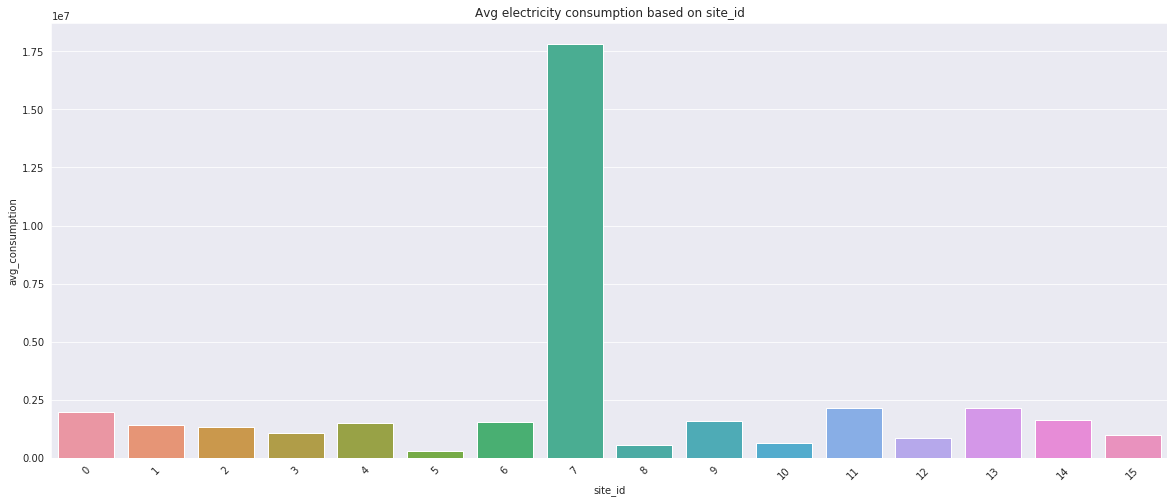

In [49]:
plt.figure(figsize = (20, 8))
sns.barplot(x = temp_df.index, y = temp_df["avg_consumption"]) # dropped column with year built = -1
plt.xticks(rotation = 45)
plt.title("Avg electricity consumption based on site_id")
plt.show()

In [50]:
temp_df = train_df[train_df["meter"] == 1]
temp_df = temp_df.groupby("site_id").agg({
    "primary_use": ["unique", "nunique"],
    "building_id": "nunique",
    "meter_reading": "sum"
})

temp_df.columns = ["_".join(i) for i in temp_df.columns.ravel()]
temp_df["avg_consumption"] = temp_df["meter_reading_sum"] / temp_df["building_id_nunique"]
temp_df

,primary_use_unique,primary_use_nunique,building_id_nunique,meter_reading_sum,avg_consumption
site_id,,,,,
0,"[Education, Office, Retail, Other, Lodging/residential]",5,24,386228032.0,1.609283e+07
2,"[Education, Lodging/residential, Retail, Office, Entertainment/public assembly, Food sales and service, Public services, Healthcare, Utility]",9,99,265270640.0,2.679501e+06
6,"[Education, Entertainment/public assembly, Lodging/residential, Office, Public services]",5,21,473136192.0,2.253029e+07
7,[Education],1,15,99575336.0,6.638356e+06
9,"[Office, Lodging/residential, Education, Entertainment/public assembly, Public services]",5,95,395516608.0,4.163333e+06
10,"[Education, Other, Technology/science]",3,9,4699348.5,5.221498e+05
11,[Education],1,4,2295540.0,5.738850e+05
13,"[Lodging/residential, Healthcare, Office, Entertainment/public assembly, Education, Public services, Parking]",7,80,229814144.0,2.872677e+06
14,"[Office, Education, Public services, Healthcare, Food sales and service, Entertainment/public assembly, Lodging/residential]",7,86,764379456.0,8.888133e+06


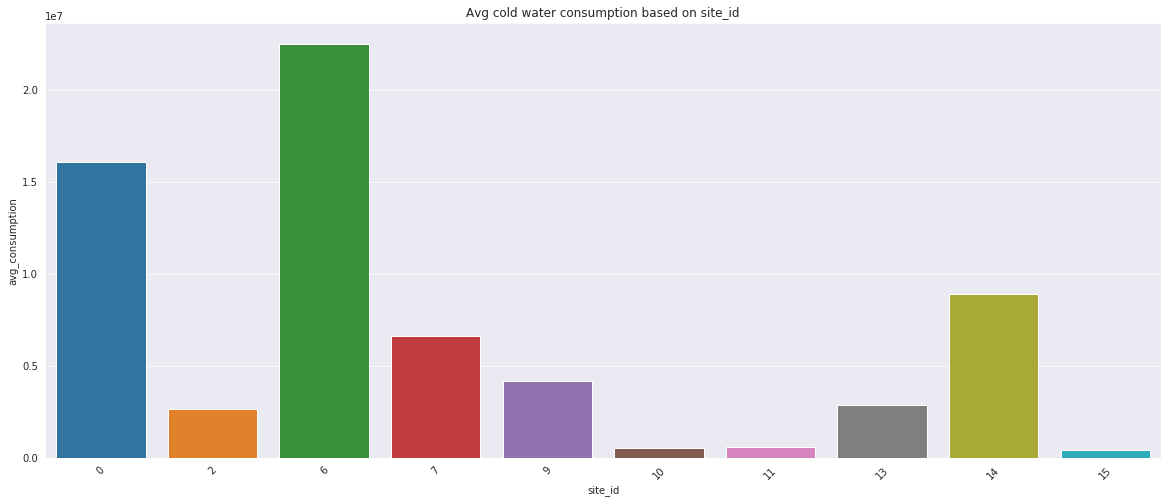

In [51]:
plt.figure(figsize = (20, 8))
sns.barplot(x = temp_df.index, y = temp_df["avg_consumption"]) # dropped column with year built = -1
plt.xticks(rotation = 45)
plt.title("Avg cold water consumption based on site_id")
plt.show()

In [52]:
temp_df = train_df[train_df["meter"] == 2]
temp_df = temp_df.groupby("site_id").agg({
    "primary_use": ["unique", "nunique"],
    "building_id": "nunique",
    "meter_reading": "sum"
})

temp_df.columns = ["_".join(i) for i in temp_df.columns.ravel()]
temp_df["avg_consumption"] = temp_df["meter_reading_sum"] / temp_df["building_id_nunique"]
temp_df

,primary_use_unique,primary_use_nunique,building_id_nunique,meter_reading_sum,avg_consumption
site_id,,,,,
6,"[Education, Office, Lodging/residential, Entertainment/public assembly]",4,23,1.332684e+08,5.794280e+06
7,[Education],1,12,9.670746e+07,8.058955e+06
9,"[Lodging/residential, Education, Entertainment/public assembly, Public services, Office]",5,89,1.169635e+08,1.314197e+06
13,"[Healthcare, Office, Lodging/residential, Entertainment/public assembly, Education, Public services, Food sales and service, Parking, Services, Manufacturing/industrial, Warehouse/storage, Other]",12,88,3.638135e+10,4.134245e+08
14,"[Office, Education, Healthcare, Food sales and service, Public services, Lodging/residential, Entertainment/public assembly]",7,43,5.117628e+08,1.190146e+07
15,"[Office, Technology/science, Education, Lodging/residential, Entertainment/public assembly, Utility, Public services, Manufacturing/industrial]",8,69,3.628093e+08,5.258106e+06


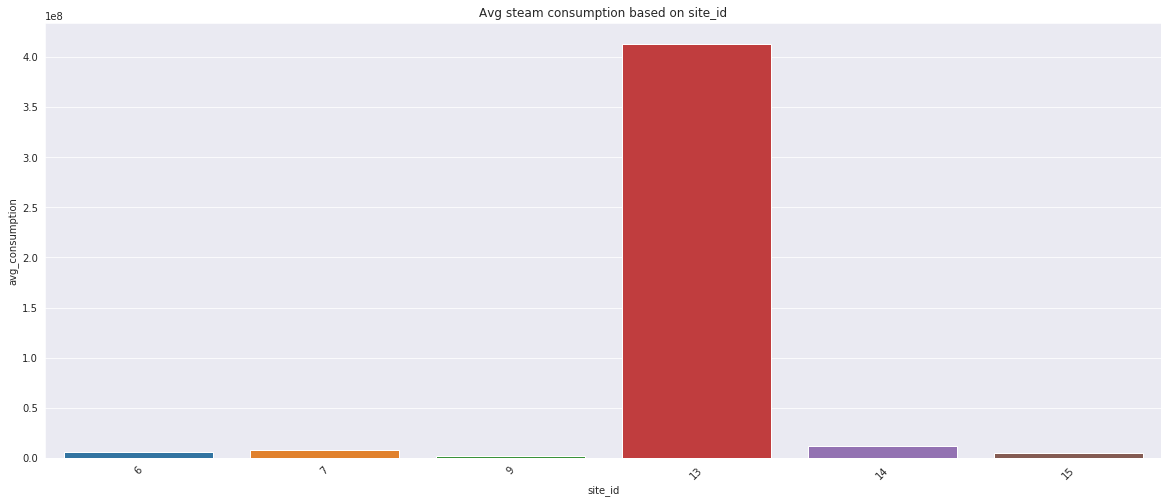

In [54]:
plt.figure(figsize = (20, 8))
sns.barplot(x = temp_df.index, y = temp_df["avg_consumption"]) # dropped column with year built = -1
plt.xticks(rotation = 45)
plt.title("Avg steam consumption based on site_id")
plt.show()

In [55]:
temp_df = train_df[train_df["meter"] == 3]
temp_df = temp_df.groupby("site_id").agg({
    "primary_use": ["unique", "nunique"],
    "building_id": "nunique",
    "meter_reading": "sum"
})

temp_df.columns = ["_".join(i) for i in temp_df.columns.ravel()]
temp_df["avg_consumption"] = temp_df["meter_reading_sum"] / temp_df["building_id_nunique"]
temp_df

,primary_use_unique,primary_use_nunique,building_id_nunique,meter_reading_sum,avg_consumption
site_id,,,,,
1,"[Education, Public services, Office]",3,12,10005950.0,8.338292e+05
2,"[Education, Lodging/residential, Office, Entertainment/public assembly, Food sales and service, Public services]",6,55,18995088.0,3.453652e+05
7,[Education],1,3,36172856.0,1.205762e+07
10,"[Education, Technology/science, Entertainment/public assembly]",3,11,167175008.0,1.519773e+07
11,[Education],1,5,4728233.0,9.456466e+05
14,"[Office, Education, Public services, Healthcare, Food sales and service, Entertainment/public assembly, Lodging/residential]",7,57,208144288.0,3.651654e+06
15,"[Entertainment/public assembly, Education]",2,2,42528464.0,2.126423e+07


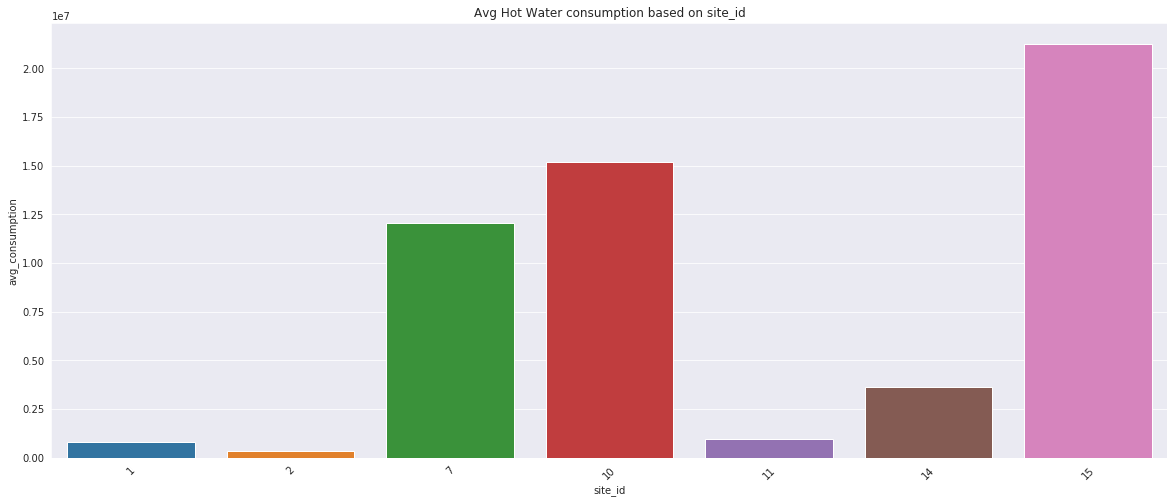

In [56]:
plt.figure(figsize = (20, 8))
sns.barplot(x = temp_df.index, y = temp_df["avg_consumption"]) # dropped column with year built = -1
plt.xticks(rotation = 45)
plt.title("Avg Hot Water consumption based on site_id")
plt.show()